#### Step 1: Import the necessary libraries and models for the analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Step 2: Data Loading

The training dataset

In [2]:
data_train = pd.read_csv("C:\\Users\\yulys\\OneDrive\\Documents\\technical_test_DS_GenAI\\train.csv")

The inference dataset

In [3]:
data_inference = pd.read_csv("C:\\Users\\yulys\\OneDrive\\Documents\\technical_test_DS_GenAI\\inference.csv")

In [4]:
data_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,94224,15748608,Gordon,619,Germany,Female,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,148424,15651450,Chu,676,Germany,Female,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,10745,15588560,Scott,748,France,Female,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,30133,15683363,Goddard,641,France,Female,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,138709,15790594,Tien,688,Germany,Male,42.0,9,161588.89,2,0.0,1.0,54019.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148526,20053,15794048,Ritchie,685,Spain,Male,44.0,7,122570.69,1,0.0,1.0,84760.32,1
148527,111771,15803681,Fiorentino,650,France,Female,49.0,7,116993.65,2,1.0,0.0,160589.85,0
148528,131097,15597951,Genovesi,637,Spain,Male,40.0,5,0.00,2,1.0,0.0,94488.82,1
148529,8620,15737051,Nwokezuike,739,France,Female,53.0,5,0.00,1,1.0,0.0,120801.65,1


In [5]:
data_inference

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,19372,15681439,Marshall,705,Germany,Female,36.0,4,154206.07,1,1.0,1.0,160162.42
1,50703,15802570,Balashov,686,France,Female,43.0,8,105419.73,1,1.0,0.0,35356.46
2,127320,15714046,Trevisani,613,Germany,Male,25.0,2,134260.36,2,1.0,0.0,101382.86
3,116274,15671148,Trevisano,581,France,Male,44.0,2,0.00,1,1.0,1.0,107640.25
4,90355,15720671,Okeke,684,France,Male,25.0,8,0.00,1,1.0,1.0,145556.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,143016,15795537,Ts'ai,738,France,Male,32.0,7,0.00,2,1.0,1.0,142680.92
16499,152096,15626787,Toscani,633,Spain,Male,45.0,9,124365.44,1,0.0,0.0,83090.68
16500,67496,15794356,Toscani,637,Germany,Male,46.0,3,120530.34,2,1.0,0.0,166586.99
16501,10369,15774192,Nnachetam,577,France,Male,29.0,8,0.00,2,1.0,1.0,126475.79


#### Step 3: Explore the Data

In [6]:
data_train.shape
data_train.columns
data_train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Churn                int64
dtype: object

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

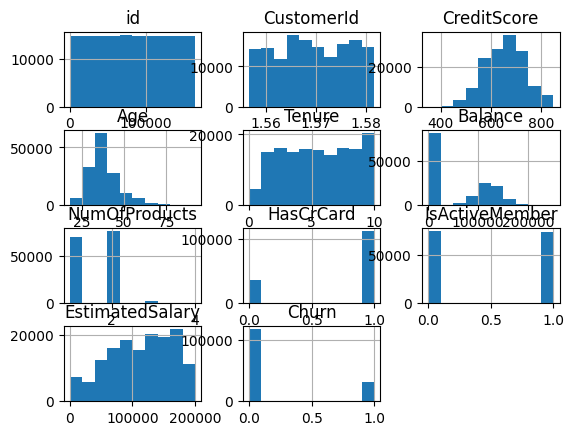

In [7]:
data_train.hist()

In [10]:
data_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,148531.000000,1.485310e+05,148531.000000,148531.000000,148531.000000,148531.000000,148531.000000,148531.00000,148531.000000,148531.000000,148531.000000
mean,82549.661848,1.569205e+07,656.469168,38.121300,5.022184,55436.712123,1.554692,0.75422,0.497479,112504.758411,0.211599
std,47622.558340,7.143646e+04,80.051965,8.872704,2.803853,62785.290142,0.547990,0.43055,0.499995,50321.231998,0.408443
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,41346.500000,1.563319e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.00000,0.000000,74588.410000,0.000000
50%,82502.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,117833.570000,0.000000
75%,123787.500000,1.575690e+07,710.000000,42.000000,7.000000,119799.270000,2.000000,1.00000,1.000000,155023.930000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data_inference.shape
data_inference.columns
data_inference.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >, <Axes: >]],
      dtype=object)

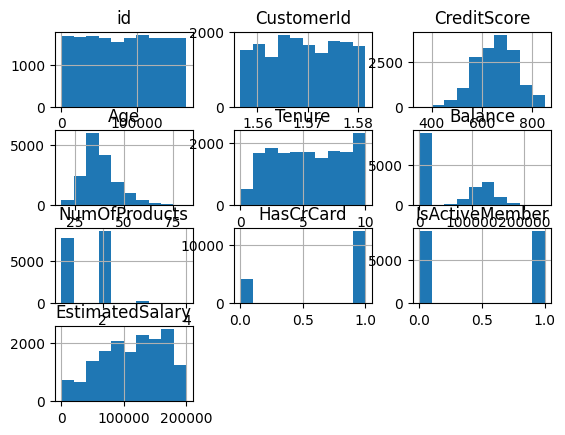

In [9]:
data_inference.hist()

In [11]:
data_inference.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,16503.000000,1.650300e+04,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000
mean,82218.035327,1.569159e+07,656.321214,38.167182,5.003878,55850.467816,1.552324,0.751560,0.500394,113205.418624
std,47810.624176,7.104983e+04,80.566571,8.817710,2.826860,63108.971408,0.539584,0.432121,0.500015,50033.939683
min,36.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,40482.000000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74850.840000
50%,82643.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,1.000000,119368.990000
75%,123663.000000,1.575457e+07,710.000000,42.000000,7.000000,120840.245000,2.000000,1.000000,1.000000,155876.060000
max,165006.000000,1.581569e+07,850.000000,82.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


#### Step 4: Data cleaning

In [12]:
data_train=data_train.drop(columns=['id'])
data_train=data_train.drop(columns=['CustomerId'])
data_train=data_train.drop(columns=['Surname'])
data_train=data_train.drop(columns=['Geography'])

In [13]:
data_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,Female,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,676,Female,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,748,Female,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,641,Female,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,688,Male,42.0,9,161588.89,2,0.0,1.0,54019.93,0
...,...,...,...,...,...,...,...,...,...,...
148526,685,Male,44.0,7,122570.69,1,0.0,1.0,84760.32,1
148527,650,Female,49.0,7,116993.65,2,1.0,0.0,160589.85,0
148528,637,Male,40.0,5,0.00,2,1.0,0.0,94488.82,1
148529,739,Female,53.0,5,0.00,1,1.0,0.0,120801.65,1


In [14]:
data_train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
gender_mapping = {'Female': 1, 'Male': 2}
data_train['Gender'] = data_train['Gender'].map(gender_mapping)
data_train['Gender'].unique()

array([1, 2], dtype=int64)

In [30]:
data_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,1,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,676,1,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,748,1,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,641,1,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,688,2,42.0,9,161588.89,2,0.0,1.0,54019.93,0
...,...,...,...,...,...,...,...,...,...,...
148526,685,2,44.0,7,122570.69,1,0.0,1.0,84760.32,1
148527,650,1,49.0,7,116993.65,2,1.0,0.0,160589.85,0
148528,637,2,40.0,5,0.00,2,1.0,0.0,94488.82,1
148529,739,1,53.0,5,0.00,1,1.0,0.0,120801.65,1


In [17]:
data_train.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [31]:
data_train.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CreditScore,1.000000,0.001219,-0.009998,0.001120,0.008324,0.011761,-0.002088,0.013759,-0.000826,-0.028249
Gender,0.001219,1.000000,-0.063719,0.009268,-0.013799,0.025522,0.006474,0.033502,-0.007265,-0.146023
Age,-0.009998,-0.063719,1.000000,-0.009102,0.064538,-0.102155,-0.012388,0.003194,-0.005644,0.342219
Tenure,0.001120,0.009268,-0.009102,1.000000,-0.009668,0.007903,0.004525,-0.004582,-0.000227,-0.019420
Balance,0.008324,-0.013799,0.064538,-0.009668,1.000000,-0.361163,-0.018637,-0.015039,0.008669,0.129463
NumOfProducts,0.011761,0.025522,-0.102155,0.007903,-0.361163,1.000000,0.006070,0.039496,-0.004292,-0.213421
HasCrCard,-0.002088,0.006474,-0.012388,0.004525,-0.018637,0.006070,1.000000,-0.021758,0.005276,-0.023917
IsActiveMember,0.013759,0.033502,0.003194,-0.004582,-0.015039,0.039496,-0.021758,1.000000,-0.007446,-0.209581
EstimatedSalary,-0.000826,-0.007265,-0.005644,-0.000227,0.008669,-0.004292,0.005276,-0.007446,1.000000,0.019081
Churn,-0.028249,-0.146023,0.342219,-0.019420,0.129463,-0.213421,-0.023917,-0.209581,0.019081,1.000000


<Axes: >

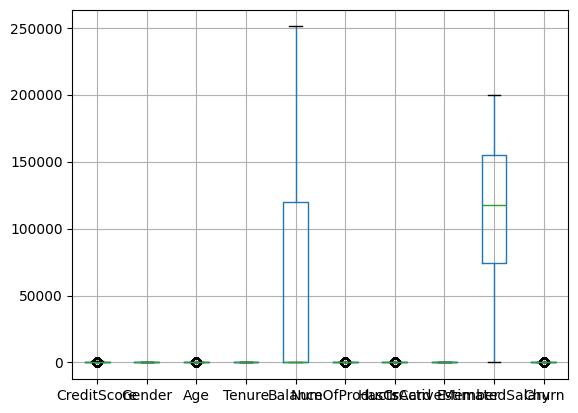

In [32]:
data_train.boxplot()

<Axes: xlabel='Churn', ylabel='EstimatedSalary'>

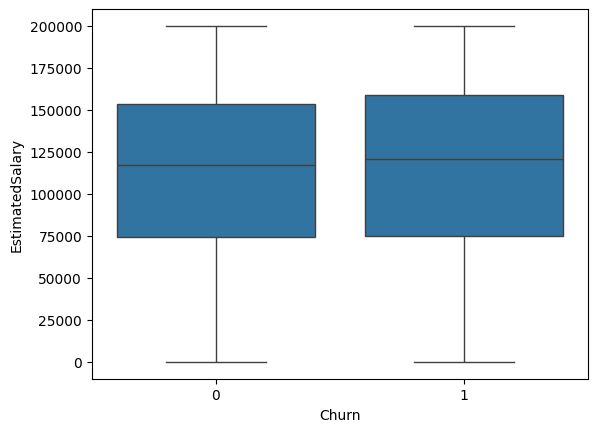

In [33]:
sns.boxplot(x='Churn', y='EstimatedSalary', data=data_train)

<Axes: xlabel='Churn', ylabel='Age'>

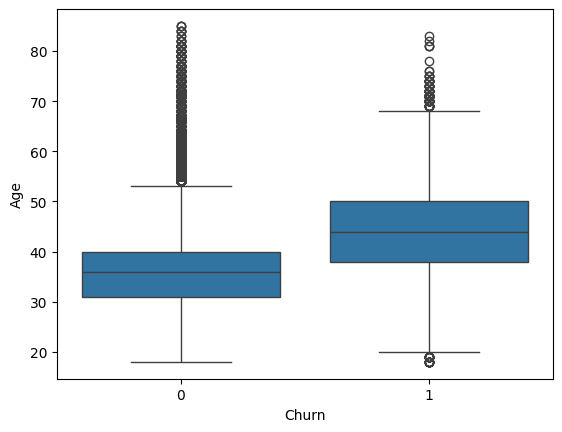

In [34]:
sns.boxplot(x='Churn', y='Age', data=data_train)

Data Cleaning Analysis for the Inference Dataset

In [37]:
data_inference.shape
data_inference.columns
data_inference.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [38]:
data_inference=data_inference.drop(columns=['id'])
data_inference=data_inference.drop(columns=['CustomerId'])
data_inference=data_inference.drop(columns=['Surname'])
data_inference=data_inference.drop(columns=['Geography'])

In [39]:
data_inference

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,705,Female,36.0,4,154206.07,1,1.0,1.0,160162.42
1,686,Female,43.0,8,105419.73,1,1.0,0.0,35356.46
2,613,Male,25.0,2,134260.36,2,1.0,0.0,101382.86
3,581,Male,44.0,2,0.00,1,1.0,1.0,107640.25
4,684,Male,25.0,8,0.00,1,1.0,1.0,145556.24
...,...,...,...,...,...,...,...,...,...
16498,738,Male,32.0,7,0.00,2,1.0,1.0,142680.92
16499,633,Male,45.0,9,124365.44,1,0.0,0.0,83090.68
16500,637,Male,46.0,3,120530.34,2,1.0,0.0,166586.99
16501,577,Male,29.0,8,0.00,2,1.0,1.0,126475.79


In [40]:
data_inference['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
gender_mapping = {'Female': 1, 'Male': 2}
data_inference['Gender'] = data_inference['Gender'].map(gender_mapping)
data_inference['Gender'].unique()

array([1, 2], dtype=int64)

In [42]:
data_inference

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,705,1,36.0,4,154206.07,1,1.0,1.0,160162.42
1,686,1,43.0,8,105419.73,1,1.0,0.0,35356.46
2,613,2,25.0,2,134260.36,2,1.0,0.0,101382.86
3,581,2,44.0,2,0.00,1,1.0,1.0,107640.25
4,684,2,25.0,8,0.00,1,1.0,1.0,145556.24
...,...,...,...,...,...,...,...,...,...
16498,738,2,32.0,7,0.00,2,1.0,1.0,142680.92
16499,633,2,45.0,9,124365.44,1,0.0,0.0,83090.68
16500,637,2,46.0,3,120530.34,2,1.0,0.0,166586.99
16501,577,2,29.0,8,0.00,2,1.0,1.0,126475.79


In [43]:
data_inference.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

#### Part 5: Machine Learning

Linear Regression Model

In [45]:
etiquetas_entremaniento=data_train.pop('Churn')

In [46]:
etiquetas_entremaniento

0         1
1         0
2         1
3         1
4         0
         ..
148526    1
148527    0
148528    1
148529    1
148530    1
Name: Churn, Length: 148520, dtype: int64

In [47]:
from sklearn.linear_model import LinearRegression
modelo1=LinearRegression()
modelo1.fit(data_train, etiquetas_entremaniento)

LinearRegression()

In [49]:
predicion=modelo1.predict(data_inference)
predicion

array([ 0.2447301 ,  0.47047684,  0.03974934, ...,  0.3462457 ,
       -0.11360369,  0.35431416])

In [64]:
predicciones_lineal_binarias = (predicion >= 0.5).astype(int)
predicciones_lineal_binarias

array([0, 0, 0, ..., 0, 0, 0])

The model has nothing to do with the needs as the results are not comparable

Logistic Regression Model 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data_train)
X_inference_scaled = scaler.transform(data_inference)

In [58]:
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train_scaled, etiquetas_entremaniento)

LogisticRegression(class_weight='balanced')

In [59]:
predicciones_inference = modelo.predict(X_inference_scaled)
predicciones_inference

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

 Decision Tree

In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data_train)
X_test_scaled = scaler.transform(X_test)  
X_inference_scaled = scaler.transform(data_inference)

In [61]:
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train_scaled, etiquetas_entremaniento)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [62]:
predicciones_test = modelo_arbol.predict(X_test_scaled)
predicciones_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)